In [1]:
"""
Linear Regression with Newton's Method
Author: Alaa Tharwat
Date: 13.03.2025
Learning From Data (LFD) Course
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [6]:
# ---------------------------
# 4. Define Regression Functions
# ---------------------------
def predict_regression(inputs, weights):
    """Compute predictions using linear model"""
    return np.dot(inputs, weights)

def compute_mse(X, weights, y):
    """Calculate Mean Squared Error"""
    errors = predict_regression(X, weights) - y.flatten()
    return np.mean(errors ** 2)

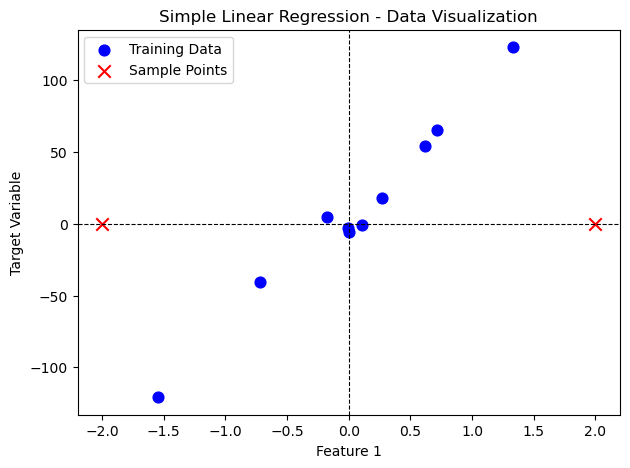

In [3]:
# ---------------------------
# 1. Generate synthetic data
# ---------------------------
n = 10  # Number of data points
x, y = make_regression(n_samples=n, n_features=1, n_informative=1, noise=10, random_state=10)
x_sample = np.array([[-2], [2]])  # Sample points for prediction

# ---------------------------
# 2. Visualize the data
# ---------------------------
plt.figure(figsize=(7, 5))
plt.scatter(x, y, s=60, marker='o', label='Training Data', color='blue')
plt.scatter(x_sample, [0, 0], s=80, marker='x', color='red', label='Sample Points')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Target Variable")
plt.title('Simple Linear Regression - Data Visualization')
plt.legend()
plt.show()

In [8]:
# ---------------------------
# 3. Prepare Data for Regression
# ---------------------------
y = y.reshape(n, 1)
x_new = np.c_[np.ones(len(x)), x.flatten()]  # Add bias term
x_new_sample = np.c_[np.ones(len(x_sample)), x_sample.flatten()]

In [10]:
# ---------------------------
# 5. Training with Newton's Method
# ---------------------------
# Precompute Hessian inverse (X^T X)^{-1}
H_inv = np.linalg.pinv(x_new.T @ x_new)

# Initialize weights and parameters
weights = np.array([0.20, 1.00])  # Initial weights
nb_epoch = 1  # Newton's method converges in 1 step

# Single optimization step
epoch = 0
mse = compute_mse(x_new, weights, y)
gradient = x_new.T @ (predict_regression(x_new, weights) - y.flatten())
weights = weights - H_inv @ gradient  # Newton update

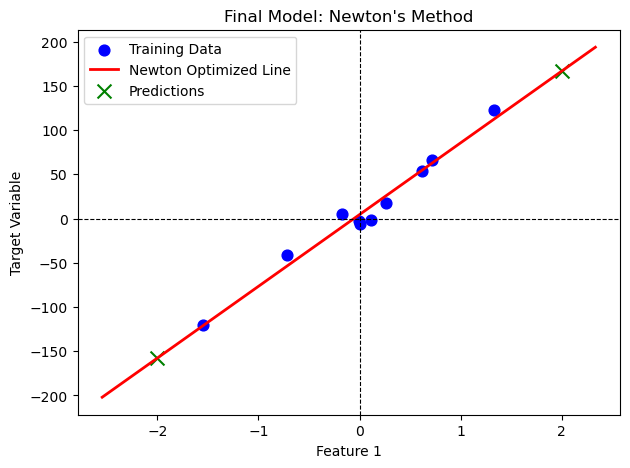

In [12]:
# ---------------------------
# 6. Visualization
# ---------------------------
x_line = np.linspace(x.min()-1, x.max()+1, 100)
y_line = predict_regression(np.c_[np.ones(len(x_line)), x_line], weights)

plt.figure(figsize=(7, 5))
plt.scatter(x, y, s=60, marker='o', label='Training Data', color='blue')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Newton Optimized Line')
plt.scatter(x_sample, predict_regression(x_new_sample, weights), 
            s=100, marker='x', color='green', label='Predictions')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Target Variable")
plt.title('Final Model: Newton\'s Method')
plt.legend()
plt.show()

In [14]:
# ---------------------------
# 7. Final Results
# ---------------------------
print("\n=== Newton's Method Results ===")
print(f"Optimal bias (w₀): {weights[0]:.4f}")
print(f"Optimal slope (w₁): {weights[1]:.4f}")
print(f"Final MSE: {compute_mse(x_new, weights, y):.4f}")
print("\nPredictions:")
print(f"  x = -2.0: ŷ = {predict_regression(x_new_sample[0], weights):.4f}")
print(f"  x =  2.0: ŷ = {predict_regression(x_new_sample[1], weights):.4f}")


=== Newton's Method Results ===
Optimal bias (w₀): 4.5518
Optimal slope (w₁): 81.1398
Final MSE: 94.1943

Predictions:
  x = -2.0: ŷ = -157.7278
  x =  2.0: ŷ = 166.8315
